## Hotel Booking Project

### Table of Contents
<ul>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#feature">Feature Engineering</a></li>
<li><a href="#Data visulization">Data visulization</a></li>
<li><a href="#Modeling">Modeling</a></li>
<li><a href="#Pipe line">Pipeline</a></li>


</ul>

In [6]:
#import Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import plotly.express as px
import datetime
import matplotlib.pyplot as plt
from datetime import datetime, timedelta
sns.set(rc={'figure.figsize':(15,7.5)})
from datetime import datetime

import warnings
warnings.filterwarnings("ignore")

In [7]:
#: Set up the current working directory & Import the dataset
df = pd.read_csv('https://raw.githubusercontent.com/kurnialif/dataset/main/hotel_bookings.csv')
df

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.00,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.00,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.00,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.00,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.00,0,1,Check-Out,2015-07-03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,City Hotel,0,23,2017,August,35,30,2,5,2,...,No Deposit,394.0,NaN,0,Transient,96.14,0,0,Check-Out,2017-09-06
119386,City Hotel,0,102,2017,August,35,31,2,5,3,...,No Deposit,9.0,NaN,0,Transient,225.43,0,2,Check-Out,2017-09-07
119387,City Hotel,0,34,2017,August,35,31,2,5,2,...,No Deposit,9.0,NaN,0,Transient,157.71,0,4,Check-Out,2017-09-07
119388,City Hotel,0,109,2017,August,35,31,2,5,2,...,No Deposit,89.0,NaN,0,Transient,104.40,0,0,Check-Out,2017-09-07


In [3]:
#Display The Maximum number of columns
pd.set_option('display.max_columns', None)
df

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,NaN,NaN,0,Transient,0.00,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,NaN,NaN,0,Transient,0.00,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,NaN,NaN,0,Transient,75.00,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Corporate,Corporate,0,0,0,A,A,0,No Deposit,304.0,NaN,0,Transient,75.00,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240.0,NaN,0,Transient,98.00,0,1,Check-Out,2015-07-03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,City Hotel,0,23,2017,August,35,30,2,5,2,0.0,0,BB,BEL,Offline TA/TO,TA/TO,0,0,0,A,A,0,No Deposit,394.0,NaN,0,Transient,96.14,0,0,Check-Out,2017-09-06
119386,City Hotel,0,102,2017,August,35,31,2,5,3,0.0,0,BB,FRA,Online TA,TA/TO,0,0,0,E,E,0,No Deposit,9.0,NaN,0,Transient,225.43,0,2,Check-Out,2017-09-07
119387,City Hotel,0,34,2017,August,35,31,2,5,2,0.0,0,BB,DEU,Online TA,TA/TO,0,0,0,D,D,0,No Deposit,9.0,NaN,0,Transient,157.71,0,4,Check-Out,2017-09-07
119388,City Hotel,0,109,2017,August,35,31,2,5,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,89.0,NaN,0,Transient,104.40,0,0,Check-Out,2017-09-07


<a id='wrangling'></a>
## Data Wrangling

In [8]:
df[df.duplicated(keep=False)]

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.00,0,1,Check-Out,2015-07-03
5,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.00,0,1,Check-Out,2015-07-03
21,Resort Hotel,0,72,2015,July,27,1,2,4,2,...,No Deposit,250.0,NaN,0,Transient,84.67,0,1,Check-Out,2015-07-07
22,Resort Hotel,0,72,2015,July,27,1,2,4,2,...,No Deposit,250.0,NaN,0,Transient,84.67,0,1,Check-Out,2015-07-07
39,Resort Hotel,0,70,2015,July,27,2,2,3,2,...,No Deposit,250.0,NaN,0,Transient,137.00,0,1,Check-Out,2015-07-07
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119352,City Hotel,0,63,2017,August,35,31,0,3,3,...,No Deposit,9.0,NaN,0,Transient-Party,195.33,0,2,Check-Out,2017-09-03
119353,City Hotel,0,63,2017,August,35,31,0,3,3,...,No Deposit,9.0,NaN,0,Transient-Party,195.33,0,2,Check-Out,2017-09-03
119354,City Hotel,0,63,2017,August,35,31,0,3,3,...,No Deposit,9.0,NaN,0,Transient-Party,195.33,0,2,Check-Out,2017-09-03
119372,City Hotel,0,175,2017,August,35,31,1,3,1,...,No Deposit,42.0,NaN,0,Transient,82.35,0,1,Check-Out,2017-09-04


In [9]:
#Drop Dublicated data
df.drop_duplicates(inplace=True)

In [10]:
#Informations of Data
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 87396 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   hotel                           87396 non-null  object 
 1   is_canceled                     87396 non-null  int64  
 2   lead_time                       87396 non-null  int64  
 3   arrival_date_year               87396 non-null  int64  
 4   arrival_date_month              87396 non-null  object 
 5   arrival_date_week_number        87396 non-null  int64  
 6   arrival_date_day_of_month       87396 non-null  int64  
 7   stays_in_weekend_nights         87396 non-null  int64  
 8   stays_in_week_nights            87396 non-null  int64  
 9   adults                          87396 non-null  int64  
 10  children                        87392 non-null  float64
 11  babies                          87396 non-null  int64  
 12  meal                           

In [11]:
#Number of null values for each column
df.isnull().sum()

hotel                                 0
is_canceled                           0
lead_time                             0
arrival_date_year                     0
arrival_date_month                    0
arrival_date_week_number              0
arrival_date_day_of_month             0
stays_in_weekend_nights               0
stays_in_week_nights                  0
adults                                0
children                              4
babies                                0
meal                                  0
country                             452
market_segment                        0
distribution_channel                  0
is_repeated_guest                     0
previous_cancellations                0
previous_bookings_not_canceled        0
reserved_room_type                    0
assigned_room_type                    0
booking_changes                       0
deposit_type                          0
agent                             12193
company                           82137


In [12]:
# too many missing values in copmany column & agent 
# so we will drop it
df.drop('company', axis=1, inplace=True)
df.drop('agent', axis=1, inplace=True)

In [13]:
#Country is a categorical so we will use mode to fill the NaN
df["country"].fillna(df["country"].mode()[0],inplace=True)

In [14]:
df.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,87396.000000,87396.000000,87396.000000,87396.000000,87396.000000,87396.000000,87396.000000,87396.000000,87392.000000,87396.000000,87396.000000,87396.000000,87396.000000,87396.000000,87396.000000,87396.000000,87396.000000,87396.000000
mean,0.274898,79.891368,2016.210296,26.838334,15.815541,1.005263,2.625395,1.875795,0.138640,0.010824,0.039075,0.030413,0.183990,0.271603,0.749565,106.337246,0.084226,0.698567
std,0.446466,86.052325,0.686102,13.674572,8.835146,1.031921,2.053584,0.626500,0.455881,0.113597,0.193775,0.369145,1.731894,0.727245,10.015731,55.013953,0.281533,0.831946
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-6.380000,0.000000,0.000000
25%,0.000000,11.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,72.000000,0.000000,0.000000
50%,0.000000,49.000000,2016.000000,27.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,98.100000,0.000000,0.000000
75%,1.000000,125.000000,2017.000000,37.000000,23.000000,2.000000,4.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,134.000000,0.000000,1.000000
max,1.000000,737.000000,2017.000000,53.000000,31.000000,19.000000,50.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,21.000000,391.000000,5400.000000,8.000000,5.000000


In [15]:
#Undefined/SC – no meal package
df["meal"].replace("Undefined", "SC", inplace=True)

In [16]:
df["children"].value_counts()

0.0     79028
1.0      4695
2.0      3593
3.0        75
10.0        1
Name: children, dtype: int64

In [17]:
#Sort values for children
df.sort_values('children',ascending = False)

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,assigned_room_type,booking_changes,deposit_type,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
328,Resort Hotel,1,55,2015,July,29,12,4,10,2,...,D,2,No Deposit,0,Contract,133.16,0,1,No-Show,2015-07-12
93710,City Hotel,0,99,2016,July,30,22,1,2,2,...,G,0,No Deposit,0,Transient,269.30,0,2,Check-Out,2016-07-25
70930,City Hotel,1,109,2017,June,26,25,2,1,2,...,G,0,No Deposit,0,Transient,255.00,0,3,Canceled,2017-04-03
116150,City Hotel,0,51,2017,July,28,11,0,4,2,...,G,1,No Deposit,0,Transient,321.50,0,1,Check-Out,2017-07-15
25824,Resort Hotel,0,22,2016,August,36,31,2,4,2,...,G,1,No Deposit,0,Transient,311.33,1,2,Check-Out,2016-09-06
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119389,City Hotel,0,205,2017,August,35,29,2,7,2,...,A,0,No Deposit,0,Transient,151.20,0,2,Check-Out,2017-09-07
40600,City Hotel,1,2,2015,August,32,3,1,0,2,...,B,0,No Deposit,0,Transient-Party,12.00,0,1,Canceled,2015-08-01
40667,City Hotel,1,1,2015,August,32,5,0,2,2,...,B,0,No Deposit,0,Transient-Party,12.00,0,1,Canceled,2015-08-04
40679,City Hotel,1,1,2015,August,32,5,0,2,3,...,B,0,No Deposit,0,Transient-Party,18.00,0,2,Canceled,2015-08-04


In [18]:
#drop irrational data
df.drop(328, axis=0, inplace=True)

In [19]:
df["babies"].value_counts()

0     86481
1       897
2        15
10        1
9         1
Name: babies, dtype: int64

In [20]:
df.sort_values('babies',ascending = False)

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,assigned_room_type,booking_changes,deposit_type,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
46619,City Hotel,0,37,2016,January,3,12,0,2,2,...,D,1,No Deposit,0,Transient,84.45,0,1,Check-Out,2016-01-14
78656,City Hotel,0,11,2015,October,42,11,2,1,1,...,B,1,No Deposit,0,Transient-Party,95.00,0,0,Check-Out,2015-10-14
104351,City Hotel,0,19,2017,January,2,8,2,2,2,...,E,1,No Deposit,0,Transient,119.50,0,0,Check-Out,2017-01-12
37302,Resort Hotel,0,1,2017,June,24,11,2,0,2,...,C,1,No Deposit,0,Transient,201.00,1,1,Check-Out,2017-06-13
84429,City Hotel,0,1,2016,February,9,25,0,1,2,...,G,0,No Deposit,0,Transient,227.00,0,3,Check-Out,2016-02-26
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35146,Resort Hotel,0,0,2017,April,15,13,0,1,2,...,F,0,No Deposit,0,Transient,105.00,0,0,Check-Out,2017-04-14
35145,Resort Hotel,0,28,2017,April,15,9,2,3,2,...,F,0,No Deposit,0,Transient,158.00,1,0,Check-Out,2017-04-14
35144,Resort Hotel,0,68,2017,April,15,13,0,1,2,...,D,0,No Deposit,0,Transient,85.00,0,2,Check-Out,2017-04-14
35143,Resort Hotel,0,10,2017,April,15,9,2,3,1,...,A,1,No Deposit,0,Transient,102.00,0,0,Check-Out,2017-04-14


In [21]:
#drop irrational data
df.drop([46619,78656], axis=0, inplace=True)

In [22]:
#Children is float so we need to convert it to int and fill missing data by zero
df["children"]=df["children"].fillna(0.0).astype(int)

In [23]:
#convert reservation status date to date format
df['reservation_status_date'] = pd.to_datetime(df['reservation_status_date'], format='%Y/%m/%d', errors='coerce')

In [24]:
df

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,assigned_room_type,booking_changes,deposit_type,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,C,3,No Deposit,0,Transient,0.00,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,C,4,No Deposit,0,Transient,0.00,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,C,0,No Deposit,0,Transient,75.00,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,A,0,No Deposit,0,Transient,75.00,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,A,0,No Deposit,0,Transient,98.00,0,1,Check-Out,2015-07-03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,City Hotel,0,23,2017,August,35,30,2,5,2,...,A,0,No Deposit,0,Transient,96.14,0,0,Check-Out,2017-09-06
119386,City Hotel,0,102,2017,August,35,31,2,5,3,...,E,0,No Deposit,0,Transient,225.43,0,2,Check-Out,2017-09-07
119387,City Hotel,0,34,2017,August,35,31,2,5,2,...,D,0,No Deposit,0,Transient,157.71,0,4,Check-Out,2017-09-07
119388,City Hotel,0,109,2017,August,35,31,2,5,2,...,A,0,No Deposit,0,Transient,104.40,0,0,Check-Out,2017-09-07


In [25]:
df["adr"].value_counts(ascending=False)

0.00      1778
75.00     1320
65.00     1260
48.00      878
85.00      858
          ... 
31.60        1
55.11        1
33.65        1
31.41        1
157.71       1
Name: adr, Length: 8878, dtype: int64

In [26]:
adr_index =pd.DataFrame(df.loc[df['adr'] == 0.00]).index

In [27]:
#Drop Zeros in adr
df.drop(adr_index, axis=0, inplace=True)

In [28]:
df["distribution_channel"].value_counts()

TA/TO        68302
Direct       12226
Corporate     4905
GDS            177
Undefined        5
Name: distribution_channel, dtype: int64

In [29]:
distribution_channel_index = df.loc[df['distribution_channel'] == "Undefined"].index

In [30]:
#Drop undefined Distribution Channel
df.drop(distribution_channel_index, axis=0, inplace=True)

In [31]:
df["reservation_status"].value_counts()

Check-Out    61775
Canceled     22847
No-Show        988
Name: reservation_status, dtype: int64

In [32]:
reservation_status_index = df.loc[df['reservation_status'] == "No-Show"].index

In [33]:
#Drop No-Show rows in Reservation Status
df.drop(reservation_status_index, axis=0, inplace=True)

In [34]:
lead_time_index = df.loc[df['lead_time'] == 0].index

In [35]:
#Drop rows in Lead Time that have zero
df.drop(lead_time_index , axis=0,inplace = True)

<Axes: xlabel='adr'>

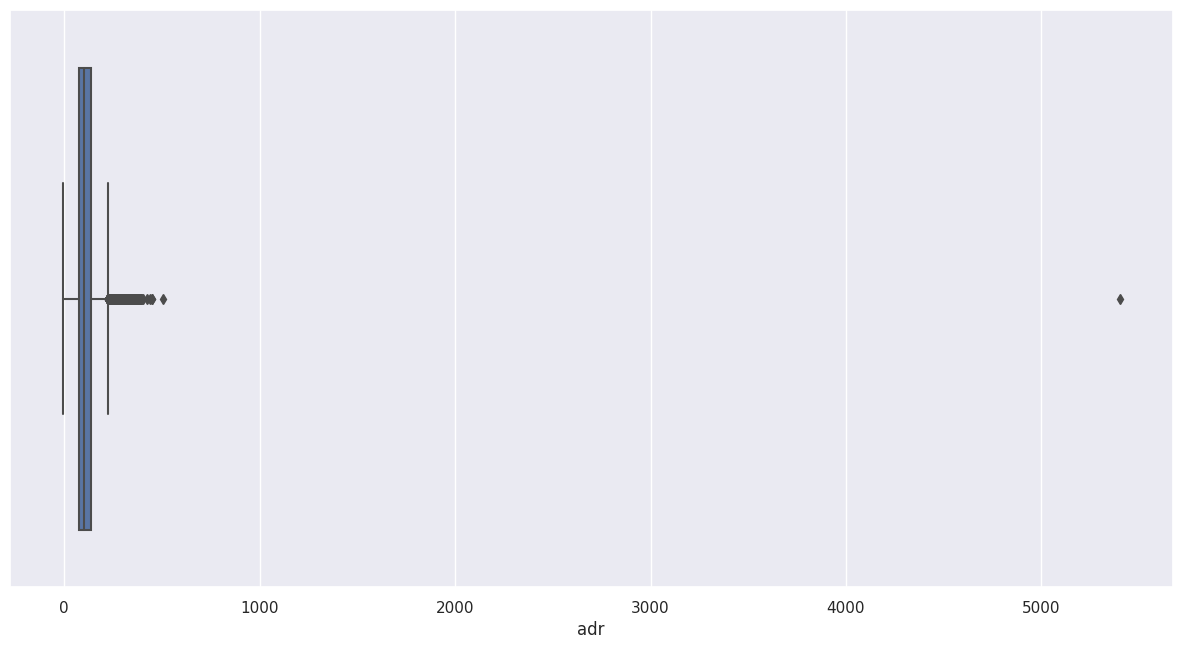

In [36]:
sns.boxplot(x="adr",data=df)

In [37]:
df.sort_values('adr',ascending = False)

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,assigned_room_type,booking_changes,deposit_type,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
48515,City Hotel,1,35,2016,March,13,25,0,1,2,...,A,1,Non Refund,0,Transient,5400.00,0,0,Canceled,2016-02-19
15083,Resort Hotel,0,1,2015,July,29,15,0,1,2,...,C,0,No Deposit,0,Transient,508.00,1,0,Check-Out,2015-07-16
103912,City Hotel,0,81,2016,December,53,31,1,1,2,...,E,1,No Deposit,0,Transient-Party,451.50,0,4,Check-Out,2017-01-02
13142,Resort Hotel,1,378,2017,August,31,1,4,10,2,...,A,0,No Deposit,0,Transient,450.00,0,0,Canceled,2016-07-22
13391,Resort Hotel,1,59,2017,August,33,13,2,4,2,...,H,1,No Deposit,0,Transient,437.00,0,0,Canceled,2017-08-03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
47466,City Hotel,1,4,2016,February,9,23,0,2,1,...,A,0,No Deposit,0,Transient,1.00,0,0,Canceled,2016-02-23
83688,City Hotel,0,59,2016,February,6,6,2,2,1,...,B,0,No Deposit,0,Transient-Party,1.00,0,0,Check-Out,2016-02-10
47427,City Hotel,1,37,2016,February,8,20,4,8,1,...,A,1,No Deposit,0,Transient,0.50,0,0,Canceled,2016-01-18
35059,Resort Hotel,0,80,2017,March,10,5,12,26,2,...,I,10,No Deposit,0,Transient-Party,0.26,0,0,Check-Out,2017-04-12


In [38]:
df.drop([48515,14969] , axis=0,inplace = True)

In [39]:
adult_index = df.loc[df['adults'] < 1].index

In [40]:
adult_index

Int64Index([ 31765,  40984,  41048,  41446,  45158,  46132,  46150,  46186,
             46196,  46220,
            ...
            116251, 116534, 116558, 117128, 117130, 117204, 117274, 117303,
            117453, 118200],
           dtype='int64', length=233)

In [41]:
df.drop(adult_index , axis=0,inplace = True)

In [42]:
df["required_car_parking_spaces"].value_counts()

0    72608
1     6385
2       24
3        3
8        2
Name: required_car_parking_spaces, dtype: int64

In [43]:
df.sort_values("required_car_parking_spaces",ascending=False)

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,assigned_room_type,booking_changes,deposit_type,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
29045,Resort Hotel,0,26,2017,March,11,14,0,5,2,...,I,1,No Deposit,0,Transient-Party,40.00,8,1,Check-Out,2017-03-19
29046,Resort Hotel,0,138,2017,March,12,19,2,2,2,...,F,1,No Deposit,122,Transient-Party,80.00,8,0,Check-Out,2017-03-23
102762,City Hotel,0,13,2016,December,50,5,1,0,1,...,A,0,No Deposit,0,Transient,96.00,3,0,Check-Out,2016-12-06
38117,Resort Hotel,0,205,2017,June,26,26,3,10,2,...,A,2,No Deposit,0,Transient,111.00,3,0,Check-Out,2017-07-09
110812,City Hotel,0,30,2017,April,17,29,2,1,2,...,A,0,No Deposit,0,Transient-Party,153.33,3,2,Check-Out,2017-05-02
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39144,Resort Hotel,0,14,2017,August,31,5,2,2,2,...,A,0,No Deposit,0,Transient,228.50,0,2,Check-Out,2017-08-09
39143,Resort Hotel,0,102,2017,August,32,7,1,1,2,...,E,0,No Deposit,0,Transient,184.00,0,1,Check-Out,2017-08-09
39142,Resort Hotel,0,91,2017,August,31,2,2,5,3,...,A,0,No Deposit,0,Contract,159.28,0,0,Check-Out,2017-08-09
39141,Resort Hotel,0,85,2017,August,31,4,2,3,2,...,A,0,No Deposit,0,Transient,197.93,0,0,Check-Out,2017-08-09


In [44]:
df.drop([29045,29046],axis=0,inplace=True)

In [45]:
df.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,79020.000000,79020.000000,79020.000000,79020.000000,79020.000000,79020.000000,79020.000000,79020.000000,79020.000000,79020.000000,79020.000000,79020.000000,79020.000000,79020.000000,79020.000000,79020.000000,79020.000000,79020.000000
mean,0.285244,86.406606,2016.226398,26.951822,15.826500,1.055961,2.747684,1.903645,0.139395,0.010744,0.026981,0.029132,0.148418,0.265857,0.801784,109.784108,0.081524,0.725399
std,0.451534,86.187236,0.681815,13.438051,8.835167,1.031923,2.032940,0.486135,0.453365,0.104921,0.162027,0.368238,1.600430,0.708639,10.396613,50.187803,0.275161,0.837560
min,0.000000,1.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.260000,0.000000,0.000000
25%,0.000000,17.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,75.000000,0.000000,0.000000
50%,0.000000,58.000000,2016.000000,27.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,100.000000,0.000000,1.000000
75%,1.000000,133.000000,2017.000000,37.000000,24.000000,2.000000,4.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,135.807500,0.000000,1.000000
max,1.000000,709.000000,2017.000000,53.000000,31.000000,19.000000,50.000000,4.000000,3.000000,2.000000,1.000000,26.000000,71.000000,18.000000,391.000000,508.000000,3.000000,5.000000


<a id='feature'></a>
## Feature Engineering

In [46]:
#collect arrival date in one column
df['arrival_date'] = df[["arrival_date_year","arrival_date_month","arrival_date_day_of_month"]].apply(lambda x: '/'.join(x.dropna().astype(str)),axis=1)

In [47]:
#convert arrival date to date format
df['arrival_date'] = pd.to_datetime(df['arrival_date'], format='%Y/%B/%d', errors='coerce')

In [48]:
#Total Guests
df["Total_Guests"]=df["adults"]+df["children"]

In [49]:
#Total Guests that has 0 guests
total_guests_index = df.loc[df['Total_Guests'] == 0].index

In [50]:
#Drop rows of total guests that have zero values 
df.drop(total_guests_index, axis=0, inplace=True)


In [51]:
#function for seasons
def season(x):
    if x in ['December','January','February']:
        return "Winter"
    if x in['March','April','May']:
        return "Spring"
    if x in['June','July', 'August']:
        return "Summer"
    if x in['September', 'October', 'November']:
        return "Autum"

In [52]:
#New column of seasons
df['Seasons']=df['arrival_date_month'].apply(season)

In [53]:
#Create new column named Total Days
df["Total_Days"]=df["stays_in_weekend_nights"]+df["stays_in_week_nights"]

<a id='Data visulization'></a>
## Data visulization

### What is The most countries the guests came from ?

In [54]:
# get number of acutal guests by country
country_data = pd.DataFrame(df.loc[df["is_canceled"] == 0]["country"].value_counts())
country_data.rename(columns={"country": "Number of Guests"}, inplace=True)
total_guests = country_data["Number of Guests"].sum()
country_data["Guests in %"] = round(country_data["Number of Guests"] / total_guests * 100, 2)
country_data["country"] = country_data.index

fig = px.pie(country_data,
             values="Number of Guests",
             names="country",
             title="Home country of guests",
             template="seaborn")
fig.update_traces(textposition="inside", textinfo="value+percent+label")
fig.show()

In [55]:
# get number of acutal guests by country
country_data = pd.DataFrame(df.loc[df["is_canceled"] == 0]["country"].value_counts())
country_data.rename(columns={"country": "Number of Guests"}, inplace=True)
total_guests = country_data["Number of Guests"].sum()
country_data["Guests in %"] = round(country_data["Number of Guests"] / total_guests * 100, 2)
country_data["country"] = country_data.index

fig = px.pie(country_data,
             values="Number of Guests",
             names="country",
             title="Home country of guests",
             template="seaborn")
fig.update_traces(textposition="inside", textinfo="value+percent+label")
fig.show()

In [56]:
# show on map
guest_map = px.choropleth(country_data,
                    locations=country_data.index,
                    color=country_data["Guests in %"], 
                    hover_name=country_data.index, 
                    color_continuous_scale=px.colors.sequential.Plasma,
                    title="Home country of guests")
guest_map.show()

### What is The most Market Segments the guests reserve from ?

In [57]:
# total bookings per market segment (incl. canceled)
segments=df["market_segment"].value_counts()

# pie plot
fig = px.pie(segments,
             values=segments.values,
             names=segments.index,
             title="Bookings per market segment",
             template="seaborn")
fig.update_traces(rotation=-90, textinfo="percent+label")
fig.show()

In [58]:
#split data to two dataframes
resort_hotel_df = df.loc[(df["hotel"] == "Resort Hotel") & (df["is_canceled"] == 0)]
city_hotel_df =df.loc[(df["hotel"] == "City Hotel") & (df["is_canceled"] == 0)]

### How does the price vary over seasons?

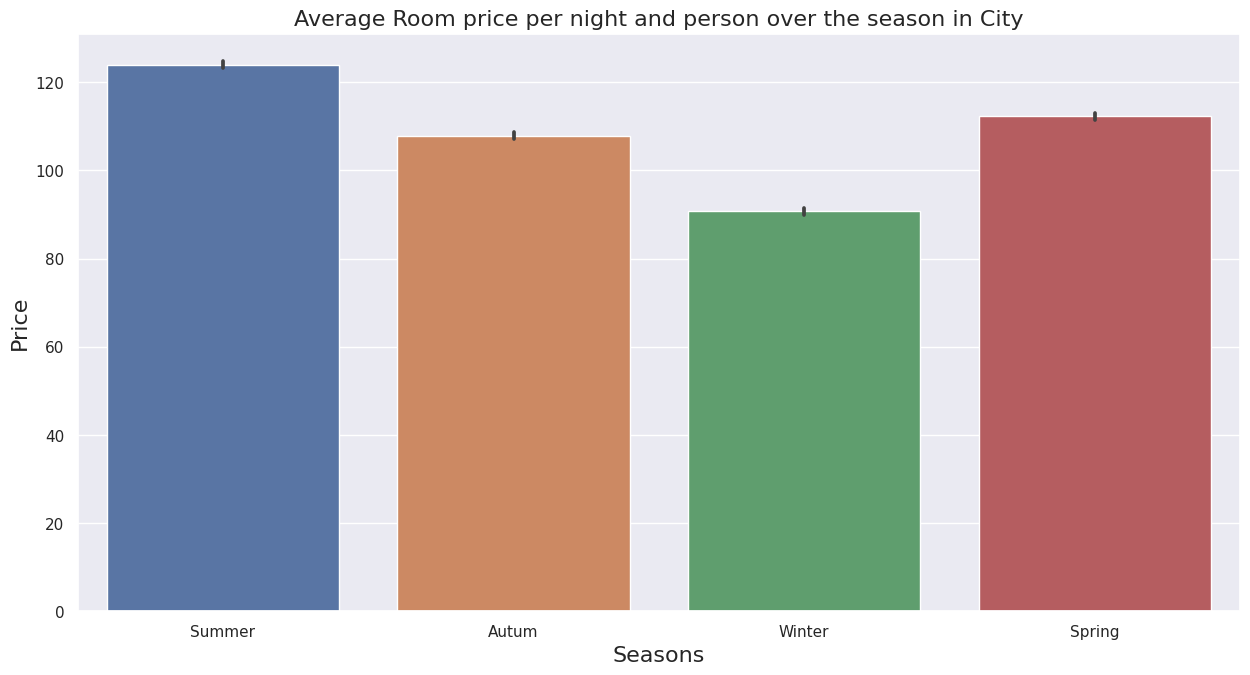

In [59]:
sns.barplot(data = city_hotel_df , x='Seasons' , y ='adr')
plt.title("Average Room price per night and person over the season in City", fontsize=16)
plt.xlabel("Seasons", fontsize=16)
plt.ylabel("Price", fontsize=16)
plt.show()

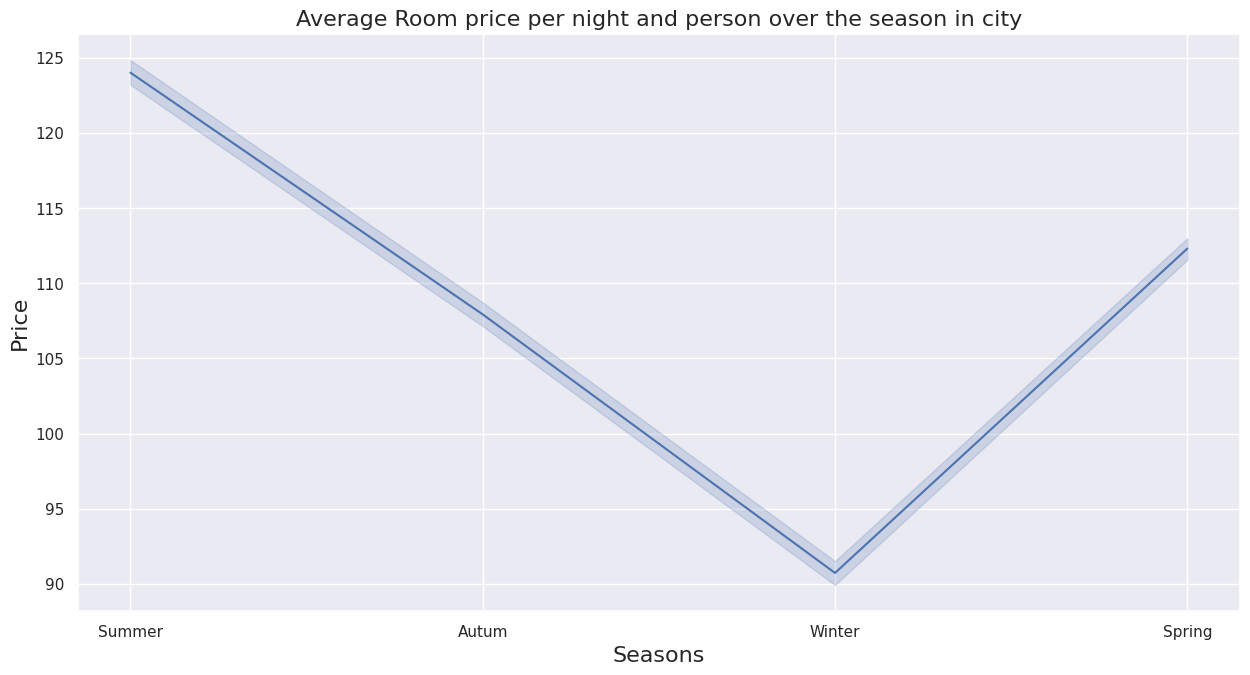

In [60]:
sns.lineplot( x='Seasons' , y ='adr', data=city_hotel_df)
plt.title("Average Room price per night and person over the season in city", fontsize=16)
plt.xlabel("Seasons", fontsize=16)
plt.ylabel("Price", fontsize=16)
plt.show()

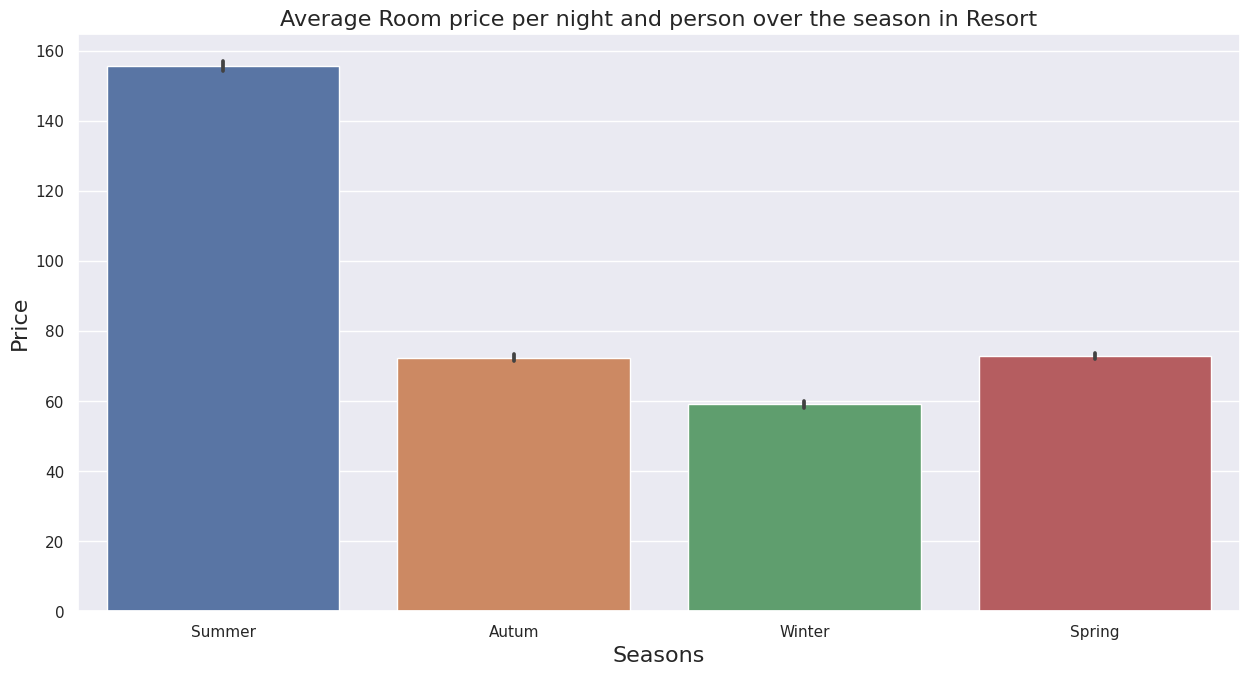

In [61]:
sns.barplot(data = resort_hotel_df , x='Seasons' , y ='adr')
plt.title("Average Room price per night and person over the season in Resort", fontsize=16)
plt.xlabel("Seasons", fontsize=16)
plt.ylabel("Price", fontsize=16)
plt.show()

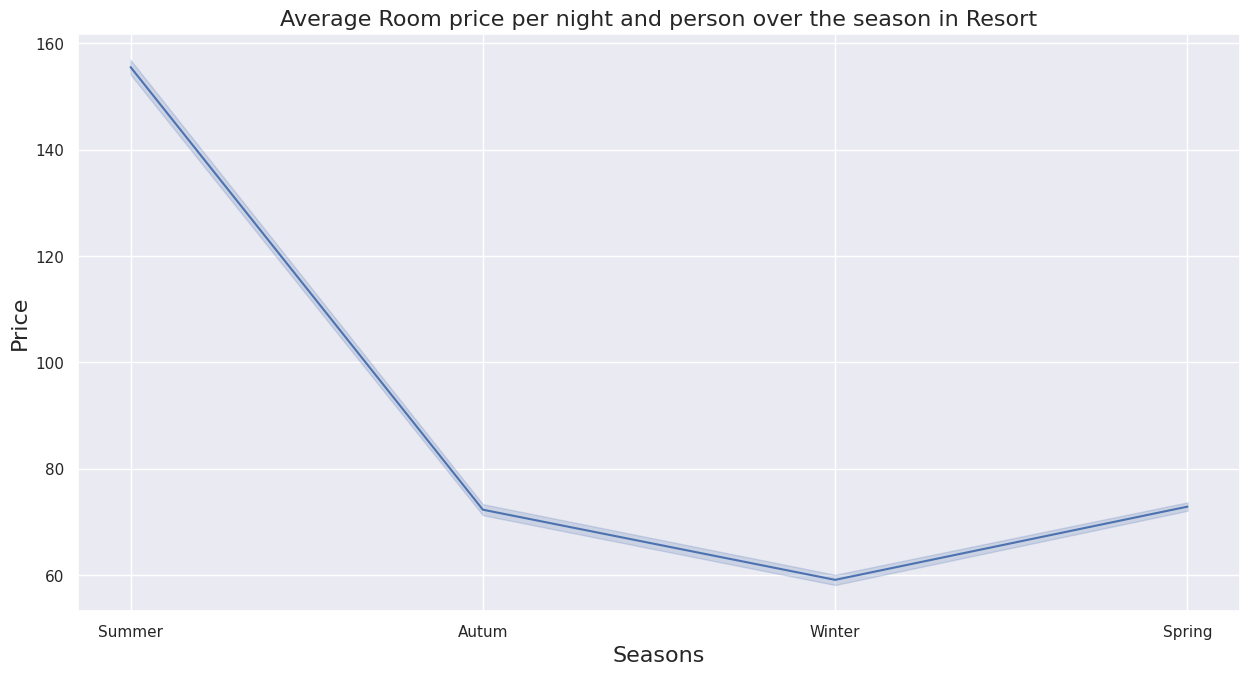

In [62]:
sns.lineplot( x='Seasons' , y ='adr', data=resort_hotel_df)
plt.title("Average Room price per night and person over the season in Resort", fontsize=16)
plt.xlabel("Seasons", fontsize=16)
plt.ylabel("Price", fontsize=16)
plt.show()

In [63]:
resort_month=resort_hotel_df.groupby(["arrival_date_month"])["adr"].mean().reset_index()

In [64]:
city_month=city_hotel_df.groupby(["arrival_date_month"])["adr"].mean().reset_index()

In [65]:
resort_month

,arrival_date_month,adr
0,April,79.107470
1,August,184.672420
2,December,69.791014
3,February,55.996908
4,January,50.802355
5,July,153.897614
6,June,110.363185
7,March,59.085269
8,May,79.607113
9,November,50.138380


In [66]:
ordered_months = ["January", "February", "March", "April", "May", "June", 
"July", "August", "September", "October", "November", "December"]

In [67]:
resort_month.index = pd.CategoricalIndex(resort_month["arrival_date_month"],categories = ordered_months,ordered=True)
city_month.index = pd.CategoricalIndex(city_month["arrival_date_month"],categories = ordered_months,ordered=True)

### How does the price per night vary over months?

In [68]:
resort_month = resort_month.sort_index()
city_month = city_month.sort_index()

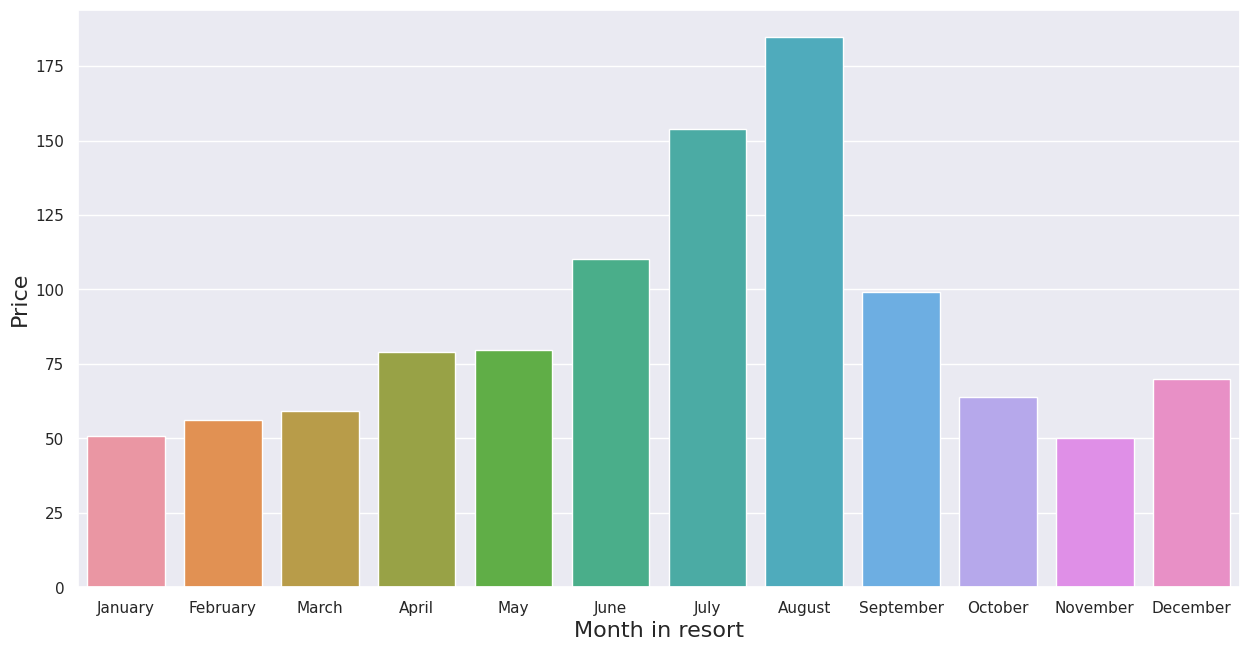

In [69]:
sns.barplot(data = resort_month , x='arrival_date_month' , y ='adr')
plt.xlabel("Month in resort", fontsize=16)
plt.ylabel("Price", fontsize=16)
plt.show()

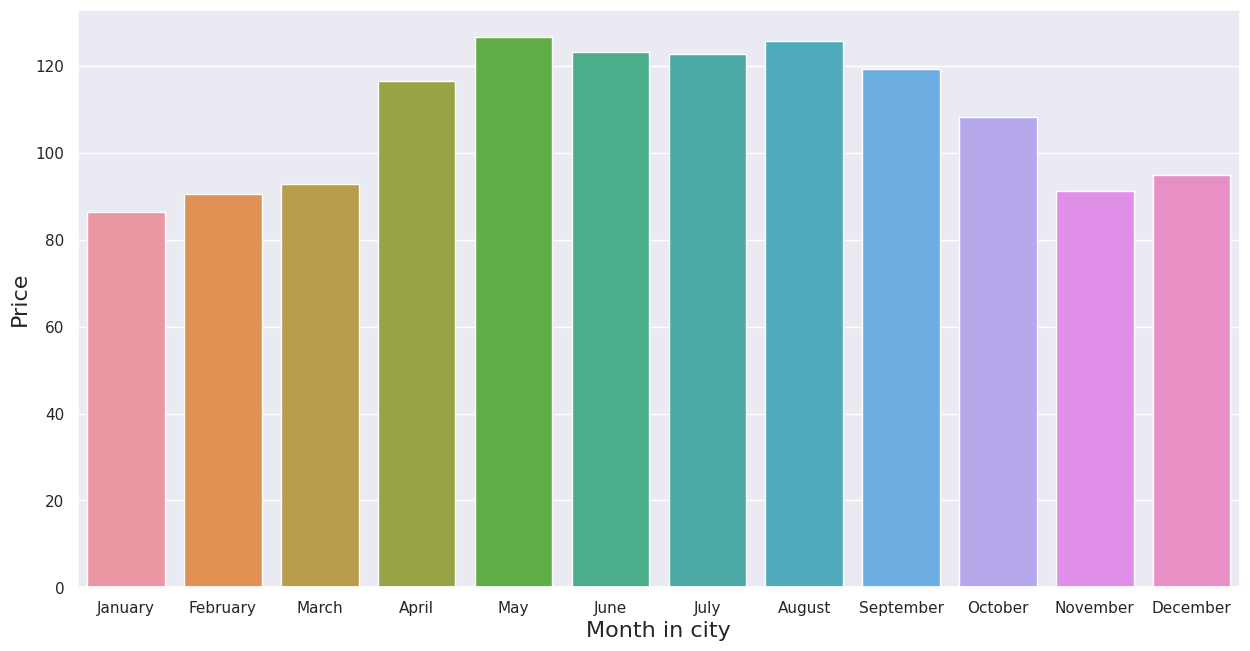

In [70]:
sns.barplot(data = city_month , x='arrival_date_month' , y ='adr')
plt.xlabel("Month in city", fontsize=16)
plt.ylabel("Price", fontsize=16)
plt.show()

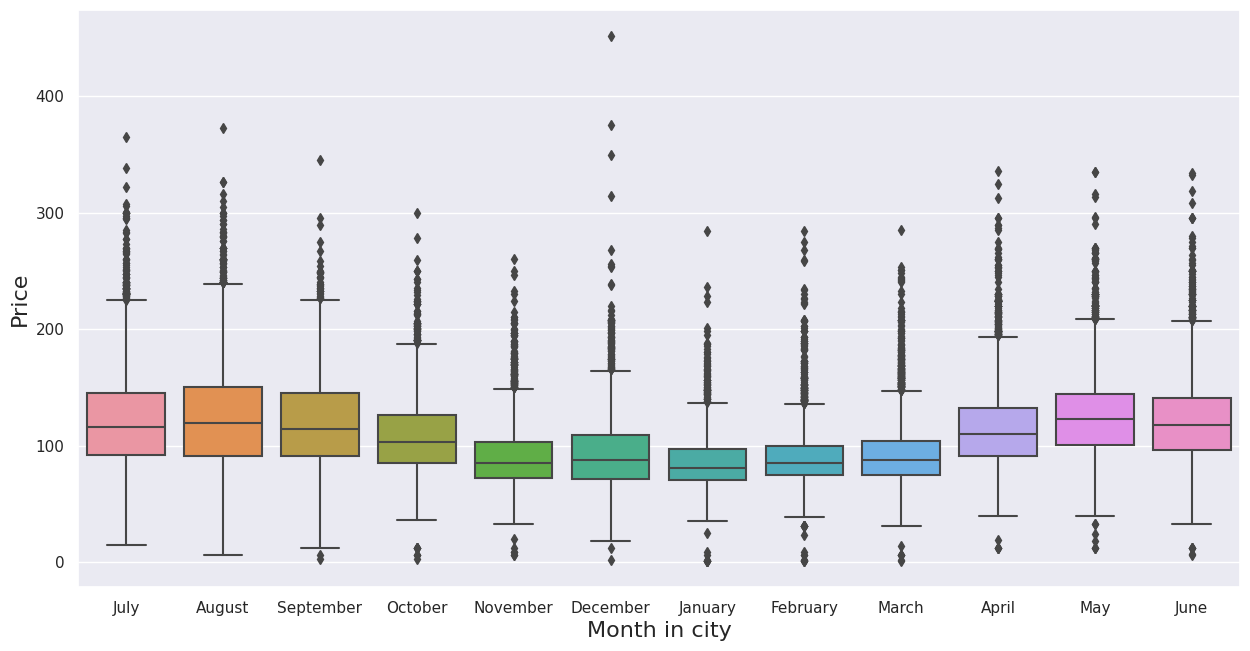

In [71]:
sns.boxplot(x="arrival_date_month", y="adr", data=city_hotel_df)
plt.xlabel("Month in city", fontsize=16)
plt.ylabel("Price", fontsize=16)
plt.show()

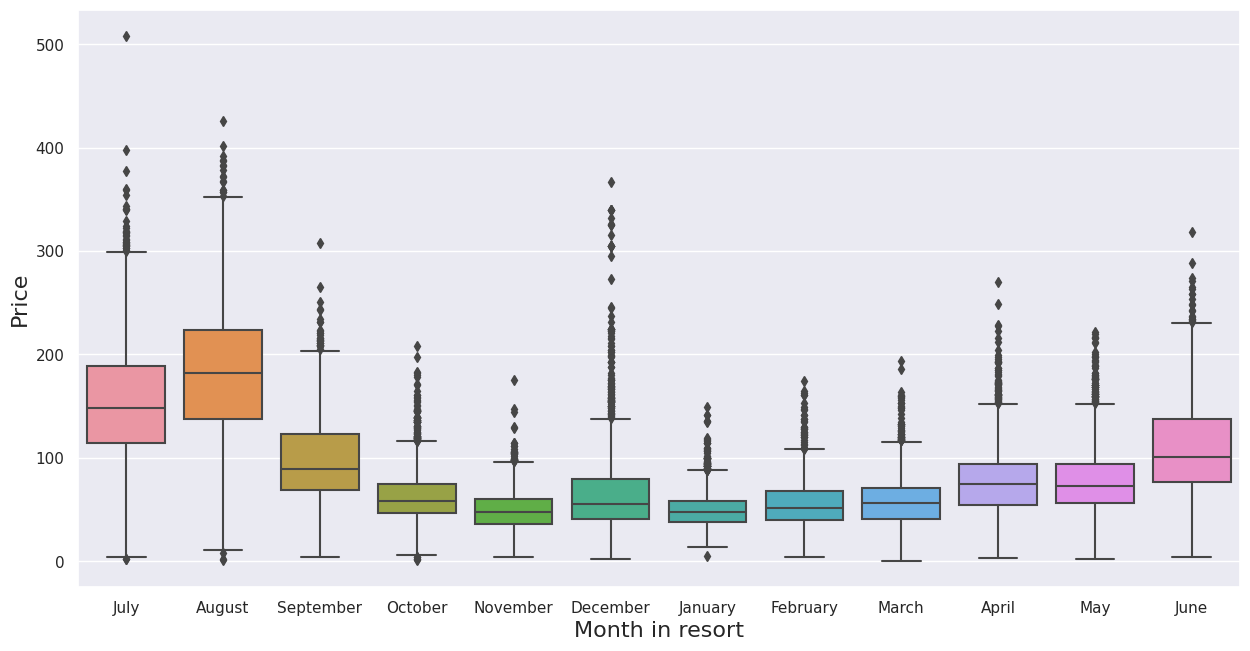

In [72]:
sns.boxplot(x="arrival_date_month", y="adr", data=resort_hotel_df)
plt.xlabel("Month in resort", fontsize=16)
plt.ylabel("Price", fontsize=16)
plt.show()

### How does the price per night vary depends on Room Type?

In [73]:
ordered_room = ["A","B","C","D","E","F","G","H"]

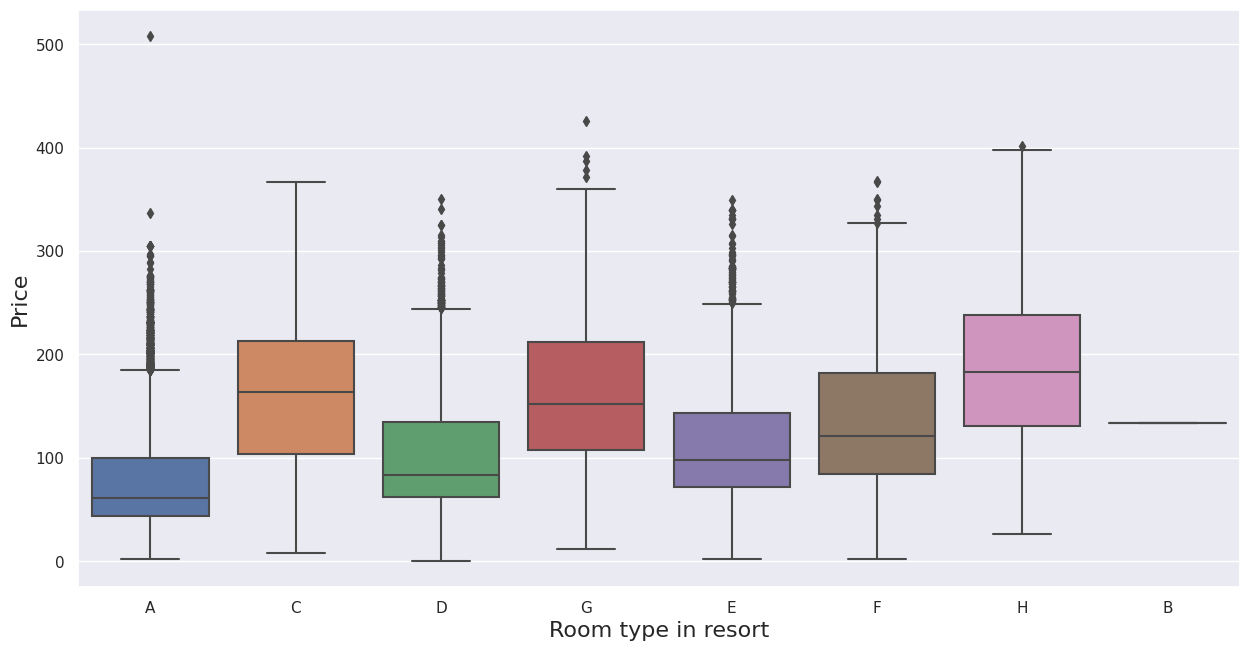

In [74]:
sns.boxplot(x="reserved_room_type", y="adr", data=resort_hotel_df)
plt.xlabel("Room type in resort", fontsize=16)
plt.ylabel("Price", fontsize=16)
plt.show()

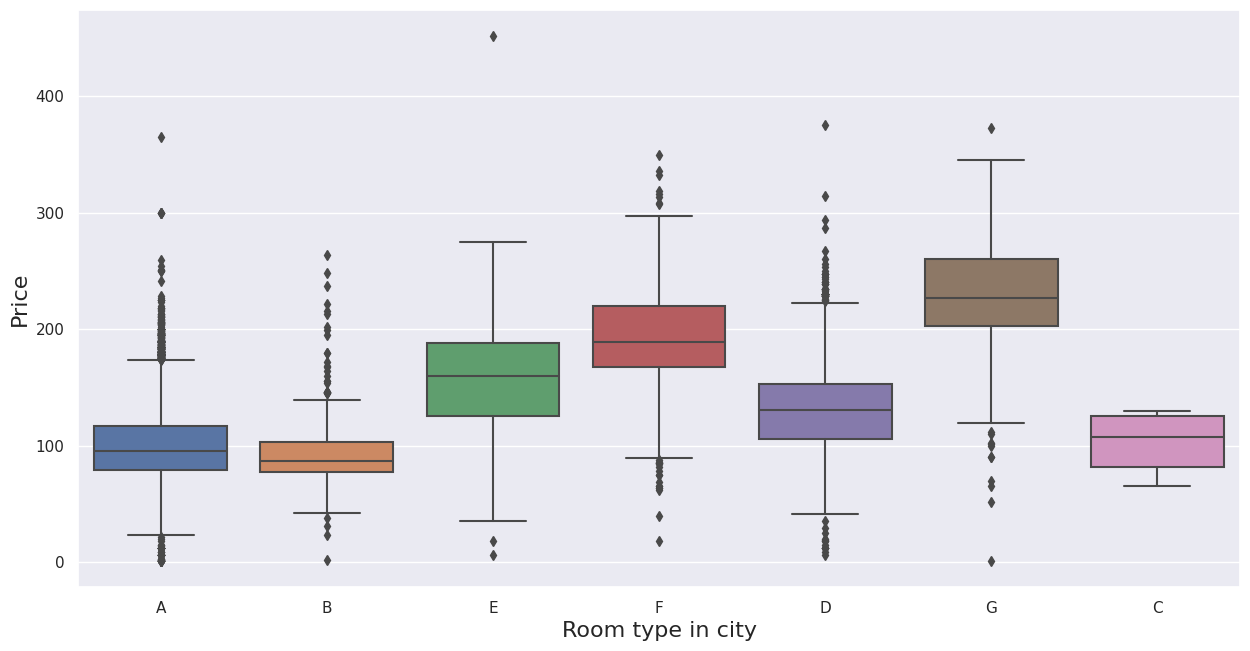

In [75]:
sns.boxplot(x="reserved_room_type", y="adr", data=city_hotel_df)
plt.xlabel("Room type in city", fontsize=16)
plt.ylabel("Price", fontsize=16)
plt.show()

In [76]:
resort_room=resort_hotel_df.groupby(["reserved_room_type"])["adr"].mean().reset_index()
city_room=city_hotel_df.groupby(["reserved_room_type"])["adr"].mean().reset_index()
ordered_room = ["A","B","C","D","E","F","G","H"]
resort_room.index = pd.CategoricalIndex(resort_room["reserved_room_type"],categories = ordered_room,ordered=True)
city_room.index = pd.CategoricalIndex(city_room["reserved_room_type"],categories = ordered_room,ordered=True)
resort_room = resort_room.sort_index()
city_room = city_room.sort_index()

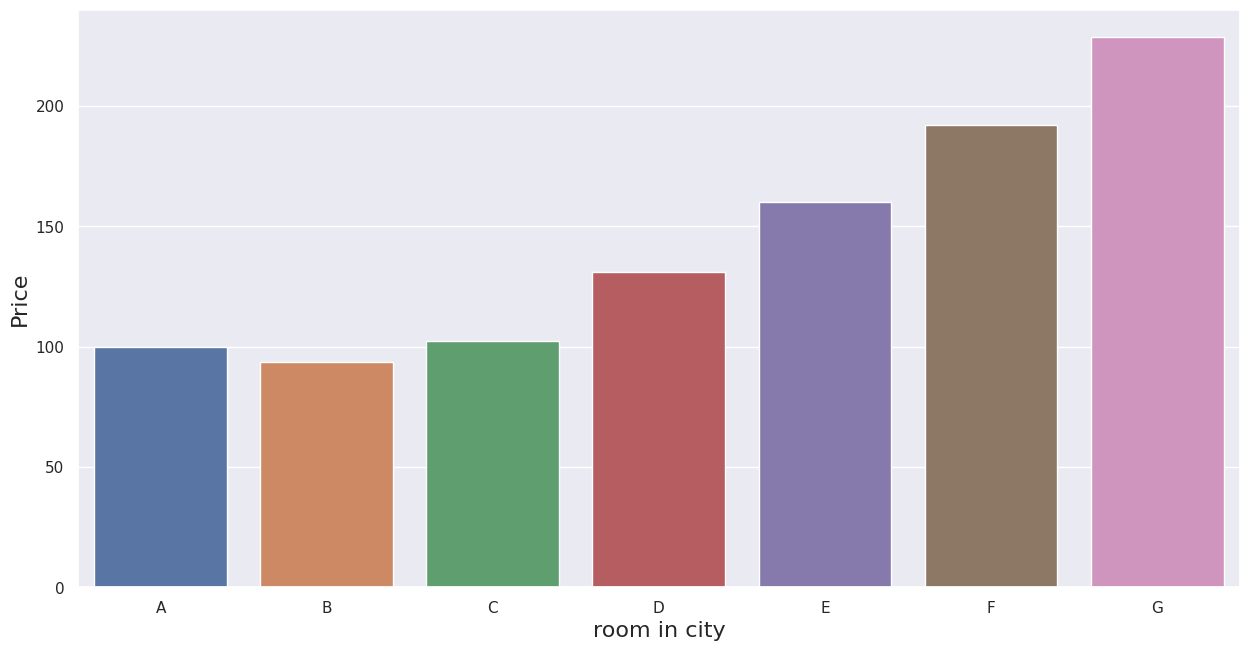

In [77]:
sns.barplot(data = city_room , x='reserved_room_type' , y ='adr')
plt.xlabel("room in city", fontsize=16)
plt.ylabel("Price", fontsize=16)
plt.show()

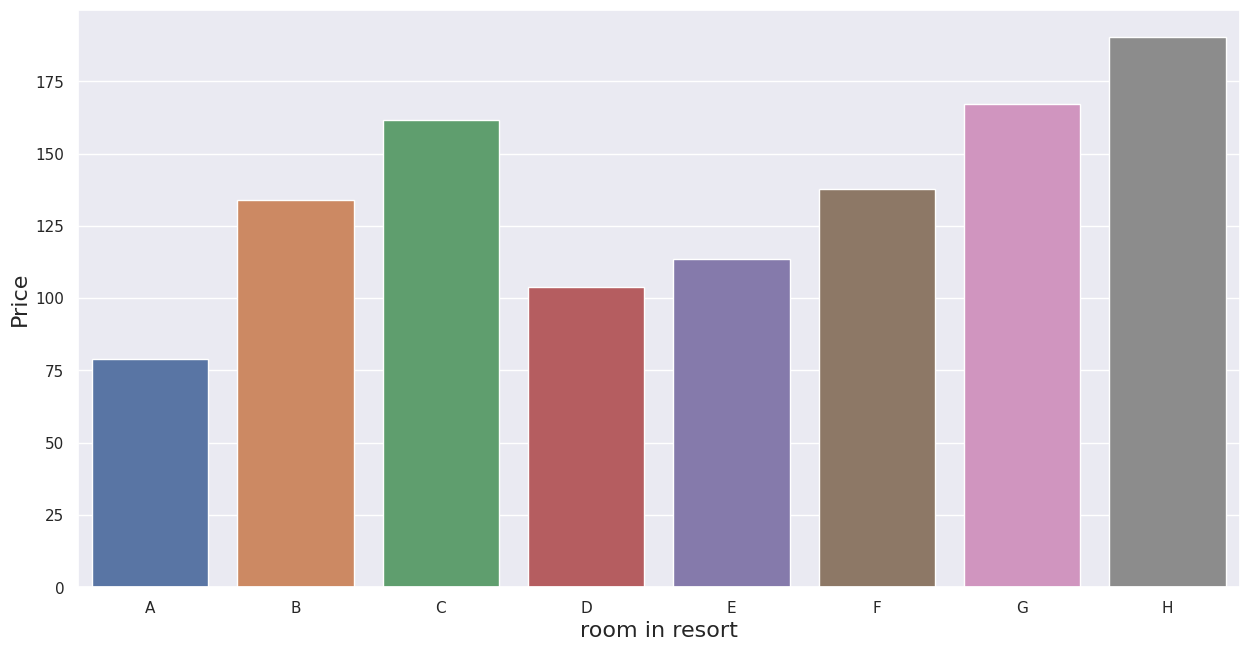

In [78]:
sns.barplot(data = resort_room , x='reserved_room_type' , y ='adr')
plt.xlabel("room in resort", fontsize=16)
plt.ylabel("Price", fontsize=16)
plt.show()

### Average By Market Segment And Room type

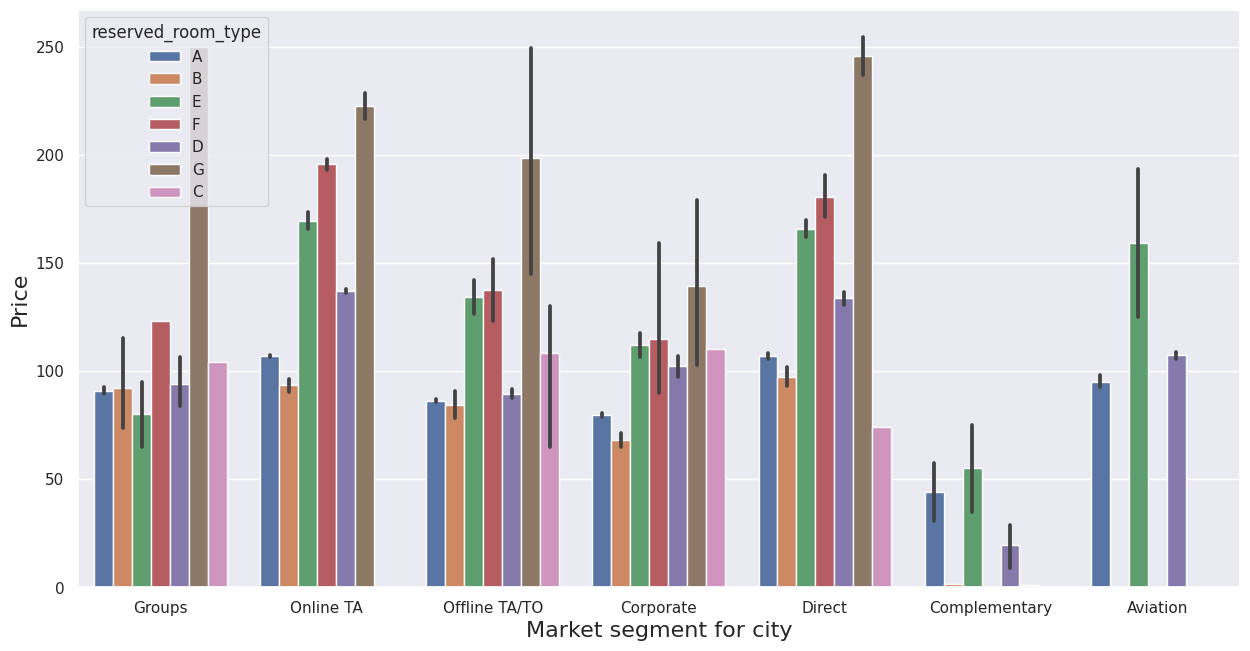

In [79]:
sns.barplot(data = city_hotel_df , x='market_segment' , y ='adr',hue="reserved_room_type")
plt.xlabel("Market segment for city", fontsize=16)
plt.ylabel("Price", fontsize=16)
plt.show()

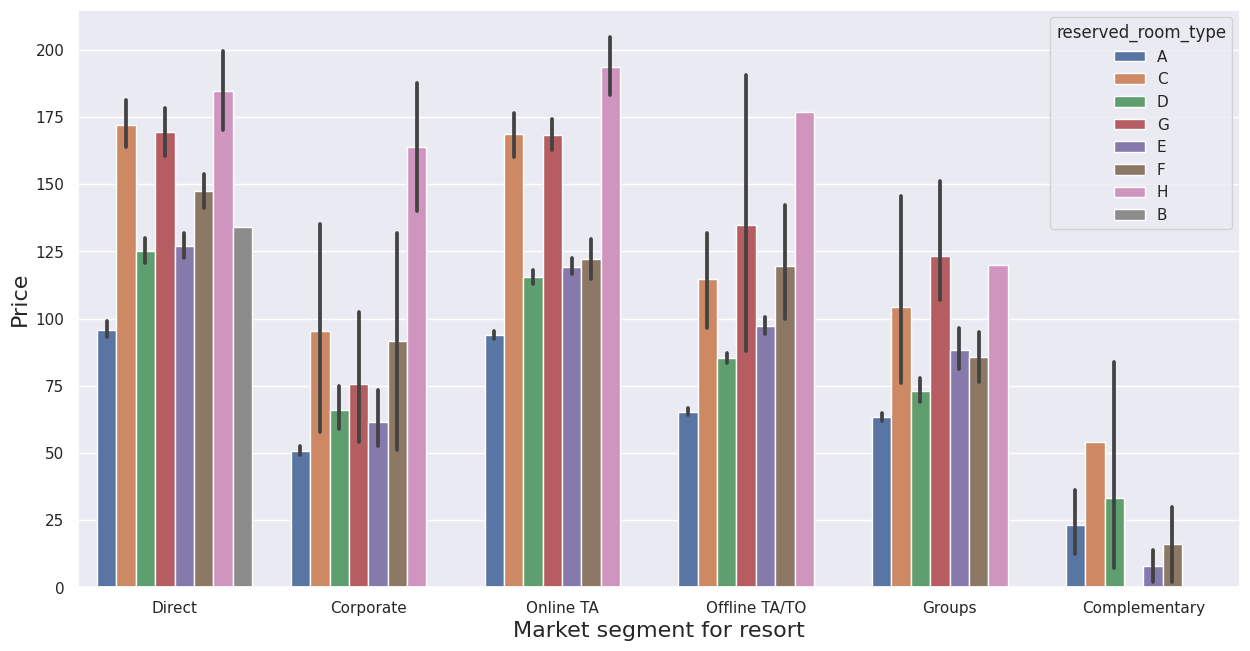

In [80]:
sns.barplot(data = resort_hotel_df , x='market_segment' , y ='adr',hue="reserved_room_type")
plt.xlabel("Market segment for resort", fontsize=16)
plt.ylabel("Price", fontsize=16)
plt.show()

<a id='Modeling'></a>
# Modeling

In [81]:
df['reservation_status'] = df['reservation_status'].astype('category')
y = df['reservation_status'].cat.codes
y_names = list(df['reservation_status'].cat.categories)
X = df.drop(columns=['reservation_status'])

### Feature Selection

In [82]:
X.drop(["country","is_canceled",'arrival_date_year', 'arrival_date_month', 'arrival_date_week_number','arrival_date_day_of_month',"meal","assigned_room_type","adr","required_car_parking_spaces","reservation_status_date","adults","children","babies","days_in_waiting_list","arrival_date","Total_Days"],axis=1,inplace=True)

In [83]:
X = pd.get_dummies(X, drop_first=True)

In [84]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=1,stratify=y)

### Feature scaling

In [85]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

### Logistic Regression

In [86]:
start_time = datetime.now()
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
lr = LogisticRegression()
lr.fit(x_train_scaled,y_train)
y_pred = lr.predict(x_test_scaled)
print(classification_report(lr.predict(x_train_scaled),y_train))
print(classification_report(y_pred,y_test))
end_time = datetime.now()
estimated = end_time-start_time
print(estimated)

              precision    recall  f1-score   support

           0       0.37      0.69      0.48      9591
           1       0.93      0.79      0.85     53625

    accuracy                           0.77     63216
   macro avg       0.65      0.74      0.67     63216
weighted avg       0.85      0.77      0.80     63216

              precision    recall  f1-score   support

           0       0.37      0.69      0.49      2425
           1       0.93      0.79      0.86     13379

    accuracy                           0.77     15804
   macro avg       0.65      0.74      0.67     15804
weighted avg       0.85      0.77      0.80     15804

0:00:00.895279


### KNN

In [87]:
start_time = datetime.now()
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(x_train_scaled,y_train)
y_pred = knn.predict(x_test_scaled)
print(classification_report(knn.predict(x_train_scaled),y_train))
print(classification_report(y_pred,y_test))
end_time = datetime.now()
estimated = end_time-start_time
print(estimated)

              precision    recall  f1-score   support

           0       0.60      0.76      0.67     14218
           1       0.92      0.85      0.89     48998

    accuracy                           0.83     63216
   macro avg       0.76      0.81      0.78     63216
weighted avg       0.85      0.83      0.84     63216

              precision    recall  f1-score   support

           0       0.47      0.60      0.52      3510
           1       0.87      0.80      0.84     12294

    accuracy                           0.76     15804
   macro avg       0.67      0.70      0.68     15804
weighted avg       0.78      0.76      0.77     15804

0:00:30.656293


### SVM

In [89]:
start_time = datetime.now()
from sklearn.svm import SVC
svm = SVC(kernel='rbf')
svm.fit(x_train_scaled,y_train)
y_pred = svm.predict(x_test_scaled)
print(classification_report(svm.predict(x_train_scaled),y_train))
print(classification_report(y_pred,y_test))
print(datetime.now())
end_time = datetime.now()
estimated = end_time-start_time
print(estimated)

              precision    recall  f1-score   support

           0       0.45      0.70      0.55     11733
           1       0.92      0.81      0.86     51483

    accuracy                           0.79     63216
   macro avg       0.69      0.75      0.71     63216
weighted avg       0.83      0.79      0.80     63216

              precision    recall  f1-score   support

           0       0.46      0.70      0.55      2952
           1       0.92      0.81      0.86     12852

    accuracy                           0.79     15804
   macro avg       0.69      0.75      0.71     15804
weighted avg       0.83      0.79      0.80     15804

2023-06-07 04:10:49.529729
0:09:09.350116


### Naive Bayes

In [90]:
start_time = datetime.now()
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()
nb.fit(x_train_scaled,y_train)
y_pred = nb.predict(x_test_scaled)
print(classification_report(nb.predict(x_train_scaled),y_train))
print(classification_report(y_pred,y_test))
print(datetime.now())
end_time = datetime.now()
estimated = end_time-start_time
print(estimated)

              precision    recall  f1-score   support

           0       0.81      0.40      0.53     36736
           1       0.51      0.87      0.64     26480

    accuracy                           0.60     63216
   macro avg       0.66      0.63      0.59     63216
weighted avg       0.69      0.60      0.58     63216

              precision    recall  f1-score   support

           0       0.80      0.39      0.52      9204
           1       0.50      0.86      0.64      6600

    accuracy                           0.59     15804
   macro avg       0.65      0.63      0.58     15804
weighted avg       0.67      0.59      0.57     15804

2023-06-07 04:11:17.457861
0:00:00.164930


### Decision Tree

In [91]:
start_time = datetime.now()
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
dt.fit(x_train_scaled,y_train)
y_pred = dt.predict(x_test_scaled)
print(classification_report(dt.predict(x_train_scaled),y_train))
print(classification_report(y_pred,y_test))
end_time = datetime.now()
estimated = end_time-start_time
print(estimated)

              precision    recall  f1-score   support

           0       0.97      0.93      0.95     18826
           1       0.97      0.99      0.98     44390

    accuracy                           0.97     63216
   macro avg       0.97      0.96      0.97     63216
weighted avg       0.97      0.97      0.97     63216

              precision    recall  f1-score   support

           0       0.54      0.51      0.52      4774
           1       0.79      0.81      0.80     11030

    accuracy                           0.72     15804
   macro avg       0.67      0.66      0.66     15804
weighted avg       0.72      0.72      0.72     15804

0:00:00.459899


### Random Forest

In [92]:
start_time = datetime.now()
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(x_train_scaled,y_train)
y_pred = rf.predict(x_test_scaled)
print(classification_report(rf.predict(x_train_scaled),y_train))
print(classification_report(y_pred,y_test))
end_time = datetime.now()
estimated = end_time-start_time
print(estimated)

              precision    recall  f1-score   support

           0       0.94      0.97      0.95     17437
           1       0.99      0.97      0.98     45779

    accuracy                           0.97     63216
   macro avg       0.96      0.97      0.97     63216
weighted avg       0.97      0.97      0.97     63216

              precision    recall  f1-score   support

           0       0.50      0.60      0.55      3717
           1       0.87      0.81      0.84     12087

    accuracy                           0.76     15804
   macro avg       0.68      0.71      0.69     15804
weighted avg       0.78      0.76      0.77     15804

0:00:09.375686


### Cross Validation

In [ ]:
start_time = datetime.now()
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_validate
kfold =KFold(n_splits=3)
scores = cross_validate(svm,x_train_scaled,y_train,cv=kfold)
end_time = datetime.now()
estimated = end_time-start_time
print(estimated)

In [ ]:
scores

In [ ]:
start_time = datetime.now()
from sklearn.model_selection import GridSearchCV
param = {'C':[1,2,3],'kernel':['linear','rbf',]}
svm = SVC()
grid_search =GridSearchCV(svm,param_grid=param,scoring='accuracy',cv = 3)
grid_search.fit(x_train_scaled,y_train)
end_time = datetime.now()
estimated = end_time-start_time
print(estimated)

In [ ]:
grid_search.best_params_

In [ ]:
from sklearn.svm import SVC
svm = SVC(C=3,kernel ='rbf')
svm.fit(x_train_scaled,y_train)
y_pred = svm.predict(x_test_scaled)
print(classification_report(y_test,y_pred))

<a id='Pipe line'></a>
# Pipeline

In [93]:
X = df.drop(columns=['reservation_status'])

In [94]:
X.drop(["country","is_canceled",'arrival_date_year', 'arrival_date_month', 'arrival_date_week_number','arrival_date_day_of_month',"meal","assigned_room_type","adr","required_car_parking_spaces","reservation_status_date","adults","children","babies","days_in_waiting_list","arrival_date"],axis=1,inplace=True)

In [95]:
y = df['reservation_status'].cat.codes

In [96]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=1,stratify=y)

In [97]:
numeric_columns = x_train.select_dtypes(exclude='object').columns

In [98]:
cat_columns = x_train.select_dtypes(include='object').columns

In [99]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
numeric_transformer = Pipeline([('imputer', SimpleImputer(strategy='median')),
                               ('scaler', StandardScaler(with_mean=False))])
cat_transformer = Pipeline([('imputer', SimpleImputer(strategy='most_frequent')),
                            ('onehot', OneHotEncoder()),
                            ('scaler', StandardScaler(with_mean=False))])

In [100]:
from sklearn.compose import ColumnTransformer
preprocessor = ColumnTransformer(
     transformers=[
          ('num', numeric_transformer, numeric_columns),
          ('cat', cat_transformer, cat_columns)])

In [101]:
preprocessor

ColumnTransformer(transformers=[('num',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(strategy='median')),
                                                 ('scaler',
                                                  StandardScaler(with_mean=False))]),
                                 Index(['lead_time', 'stays_in_weekend_nights', 'stays_in_week_nights',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'booking_changes',
       'total_of_special_requests', 'Total_Guests', 'Total_Days'],
      dtype='object')),
                                ('cat',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('onehot', OneHotEncoder()),
                                                 ('scaler',
                                                  StandardScaler(with_mean=False))]),
                                 Index(['hotel', 'market_segment', 'distribution_channel', 'reserved_room_type',
       'deposit_type', 'customer_type', 'Seasons'],
      dtype='object'))])

In [102]:
from sklearn.svm import SVC
pipe = Pipeline([('processing',preprocessor),('model',SVC(C=3,kernel ='rbf'))])
pipe.fit(x_train,y_train)

Pipeline(steps=[('processing',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   StandardScaler(with_mean=False))]),
                                                  Index(['lead_time', 'stays_in_weekend_nights', 'stays_in_week_nights',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'booking_changes',
       'total_of_s...Total_Guests', 'Total_Days'],
      dtype='object')),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehot',
                                                                   OneHotEncoder()),
                                                                  ('scaler',
                                                                   StandardScaler(with_mean=False))]),
                                                  Index(['hotel', 'market_segment', 'distribution_channel', 'reserved_room_type',
       'deposit_type', 'customer_type', 'Seasons'],
      dtype='object'))])),
                ('model', SVC(C=3))])

In [103]:
y_pred = pipe.predict(x_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.71      0.43      0.53      4508
           1       0.80      0.93      0.86     11296

    accuracy                           0.79     15804
   macro avg       0.76      0.68      0.70     15804
weighted avg       0.78      0.79      0.77     15804



In [104]:
import joblib
save =  joblib.dump(pipe,'Hotel Prediction model.pkl')

In [107]:
!pip install pyngrok==4.1.1
!pip install flask_ngrok

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Preparing metadata (setup.py) ... done
  Created wheel for pyngrok: filename=pyngrok-4.1.1-py3-none-any.whl size=15963 sha256=28be6446367428267691c048c8081a0f7c01e2446e0b0c6f72e2f01d4ffd8f82
  Stored in directory: /root/.cache/pip/wheels/4c/7c/4c/632fba2ea8e88d8890102eb07bc922e1ca8fa14db5902c91a8
Successfully built pyngrok
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [108]:
from pyngrok import ngrok
ngrok.kill()

NGROK_AUTH_TOKEN="27peAqIGJrYB0ZqjiR28bPyVIwg_3zQrJDftdDDWG17u8TUkC"
ngrok.set_auth_token(NGROK_AUTH_TOKEN)

In [109]:
ngrok.connect(8501)

'http://32c3-34-90-141-163.ngrok-free.app'

In [110]:
%%writefile app.py
import numpy as np
import pandas as pd
import streamlit as st 
import joblib

classifier=joblib.load('Hotel Prediction model.pkl')


def welcome():
    return "Welcome All"


def predict_hotel(hotel,lead_time,stays_in_weekend_nights,stays_in_week_nights,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,booking_changes,deposit_type,customer_type,total_of_special_requests,Total_Guests,Seasons,Total_Days):
    prediction=classifier.predict(pd.DataFrame({'hotel':[hotel],'lead_time':[lead_time],'stays_in_weekend_nights':[stays_in_weekend_nights],'stays_in_week_nights':[stays_in_week_nights],'market_segment':[market_segment],'distribution_channel':[distribution_channel],'is_repeated_guest':[is_repeated_guest],'previous_cancellations':[previous_cancellations],'previous_bookings_not_canceled':[previous_bookings_not_canceled],'reserved_room_type':[reserved_room_type],'booking_changes':[booking_changes],'deposit_type':[deposit_type],'customer_type':[customer_type],'total_of_special_requests':[total_of_special_requests],'Total_Guests':[Total_Guests],'Seasons':[Seasons],'Total_Days':[Total_Days]}))
    print(prediction)
    label = ['Canceled','Check-Out',]
    return label[prediction[0]]
  
      
def main():
    st.title("Hotel")
    html_temp = """
    <div style="background-color:tomato;padding:10px">
    <h2 style="color:white;text-align:center;">Streamlit Hotel ML App </h2>
    </div>
    """
    st.markdown(html_temp,unsafe_allow_html=True)
    hotel = st.text_input("Hotel")
    lead_time = st.text_input("Lead Time")
    stays_in_weekend_nights = st.text_input("Stays In weekend Nights")
    stays_in_week_nights = st.text_input("Stays In Week Nights")
    market_segment = st.text_input("Market Segment")
    distribution_channel = st.text_input("Distribution Channel")
    is_repeated_guest = st.text_input("Is Repeated Guest (Ex,0 or 1)")
    previous_cancellations = st.text_input("Previous Cancellations")
    previous_bookings_not_canceled = st.text_input("Previous Bookings Not Canceled")
    reserved_room_type = st.text_input("Reserved Room Type")
    booking_changes = st.text_input("Booking Changes")
    deposit_type = st.text_input("Deposit Type")
    customer_type = st.text_input("Customer Type")
    total_of_special_requests = st.text_input("Total Of Special Requests")
    Total_Guests = st.text_input("Total Guests")
    Seasons = st.text_input("Season")
    Total_Days = st.text_input("Total Days")
    result=""
    if st.button("Predict"):
        result=predict_hotel(hotel,lead_time,stays_in_weekend_nights,stays_in_week_nights,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,booking_changes,deposit_type,customer_type,total_of_special_requests,Total_Guests,Seasons,Total_Days)
    st.success('The output is {}'.format(result))
    if st.button("About"):
        st.text("Cancellation Predection Model")
        st.text("Built with Streamlit")
if __name__=='__main__':
    main()        


Writing app.py


In [111]:
!streamlit run app.py

/bin/bash: streamlit: command not found


# Thanks ^-^